In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('adult.csv')

In [45]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [46]:
#1
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'relationship', 'race', 'gender', 'native-country'])

In [47]:
print(df.isna().sum())

age                               0
fnlwgt                            0
educational-num                   0
occupation                        0
capital-gain                      0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 95, dtype: int64


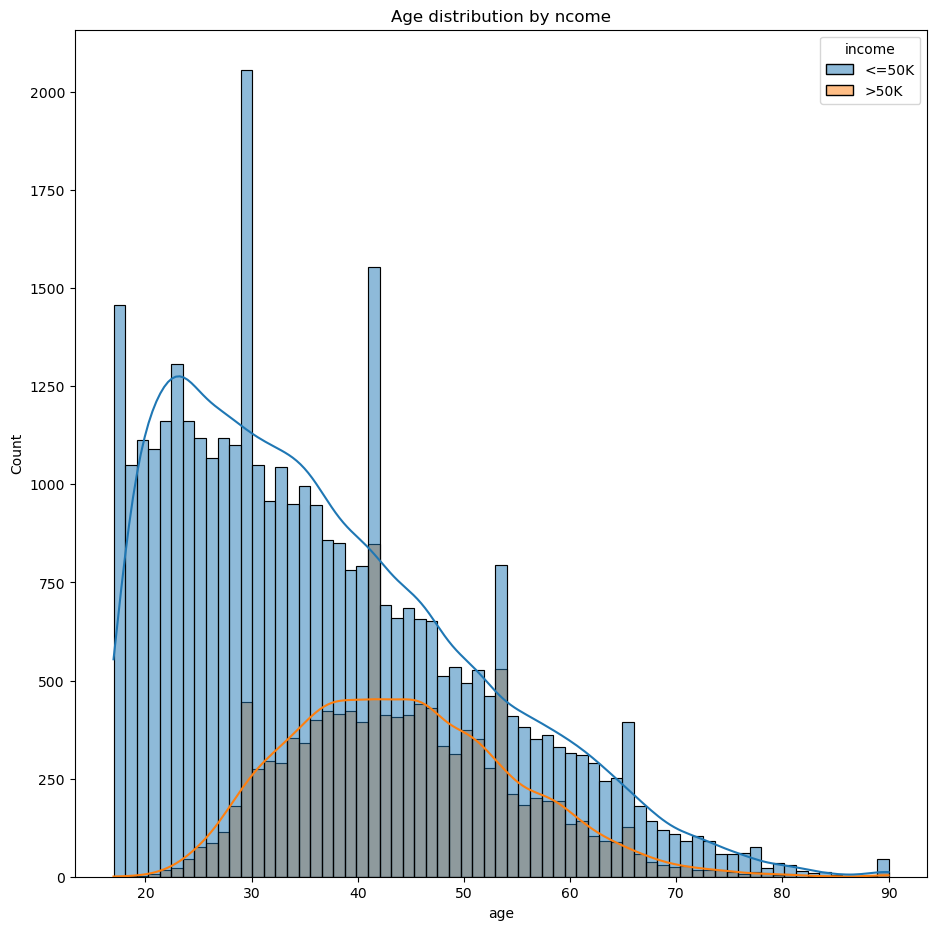

In [48]:
#2a
plt.figure(figsize=(11,11))
sns.histplot(data=df, x='age', hue='income', kde=True)
plt.title('Age distribution by ncome')
plt.show()

In [49]:
print(df.groupby('income')['age'].agg(['mean', 'std']))

             mean        std
income                      
<=50K   36.872184  14.104118
>50K    44.275178  10.558983


In [50]:
#2b
df = pd.read_csv('adult.csv')

In [51]:
ct = pd.crosstab(df['education'], df['income'], margins=True)
ct

income,<=50K,>50K,All
education,,,
10th,1302,87,1389
11th,1720,92,1812
12th,609,48,657
1st-4th,239,8,247
5th-6th,482,27,509
7th-8th,893,62,955
9th,715,41,756
Assoc-acdm,1188,413,1601
Assoc-voc,1539,522,2061


In [52]:
#2c
ct = pd.crosstab(df['income'], df['marital-status'], margins=True)
ct

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
income,,,,,,,,
<=50K,5962,23,12395,570,15384,1431,1390,37155
>50K,671,14,9984,58,733,99,128,11687
All,6633,37,22379,628,16117,1530,1518,48842


In [53]:
#2d
max_hours = df['hours-per-week'].max()
max_hours

99

In [55]:
num_people = len(df[df['hours-per-week'] == max_hours])
percent_rich = len(df[(df['hours-per-week'] == max_hours) & (df['income'] == '>50K')]) / num_people * 100
print(f"{num_people} челов работают {max_hours} часов в неделю, {percent_rich:.1f}% и из них это >50K в год.")

137 челов работают 99 часов в неделю, 29.9% и из них это >50K в год.


In [56]:
#2e
education_hours = df[['education', 'hours-per-week']].groupby(['education']).mean().sort_values(by='hours-per-week')
education_hours

,hours-per-week
education,
11th,33.952539
12th,35.374429
Preschool,36.566265
10th,36.986321
9th,38.359788
1st-4th,38.761134
Some-college,38.865784
5th-6th,38.923379
7th-8th,39.003141


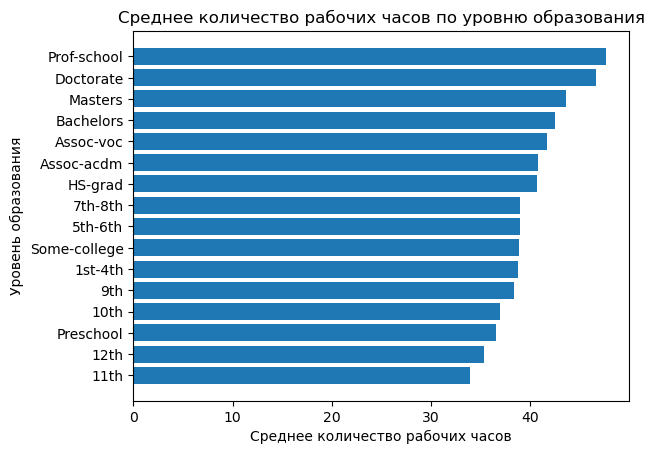

In [57]:
plt.barh(education_hours.index, education_hours['hours-per-week'])
plt.title('Среднее количество рабочих часов по уровню образования')
plt.xlabel('Среднее количество рабочих часов')
plt.ylabel('Уровень образования')
plt.show()

In [58]:
#2f
income_by_country = df.pivot_table(index='native-country', columns='income', values='age', aggfunc='count', fill_value=0)
income_by_country = income_by_country.sort_values(by='>50K')
income_by_country

income,<=50K,>50K
native-country,,
Holand-Netherlands,1,0
Outlying-US(Guam-USVI-etc),22,1
Laos,21,2
Trinadad&Tobago,25,2
Honduras,18,2
Guatemala,85,3
Scotland,18,3
Nicaragua,46,3
Peru,42,4


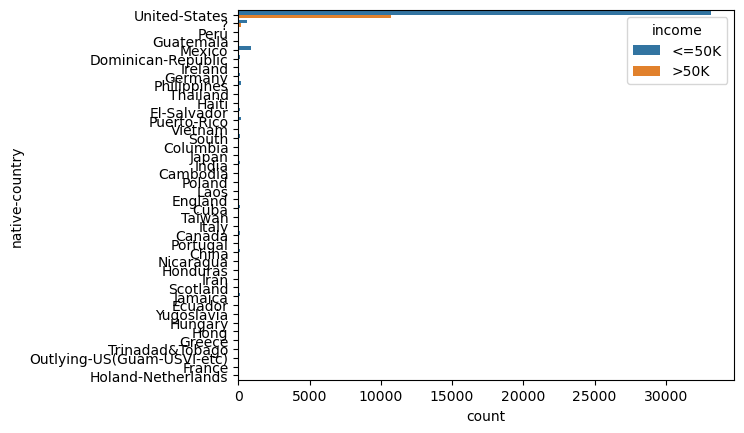

In [59]:
sns.countplot(y='native-country', hue='income', data=df)
plt.show()

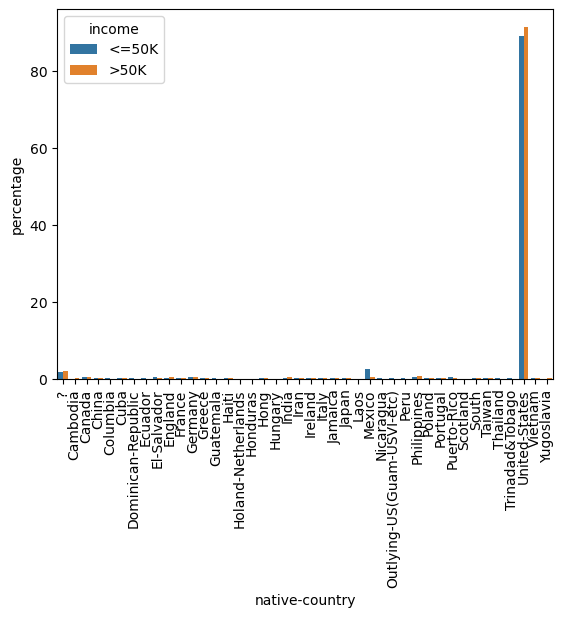

In [60]:
grouped = df.groupby(['income'], sort=False)
native_counts = grouped['native-country'].value_counts(normalize=True, sort=False)

native_data = [
    {'native-country': native_country, 'income': income, 'percentage': percentage*100} for 
    (income, native_country), percentage in dict(native_counts).items()
]

df_native = pd.DataFrame(native_data)

p = sns.barplot(x="native-country", y="percentage", hue="income", data=df_native)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

In [61]:
# Из графика можно сделать выводы о том, какие страны имеют большую долю людей с высоким заработком (>50K) и какие страны имеют большую долю людей с низким 
# заработком (<=50K). Мы также можем заметить, что некоторые страны, такие как США и Канада, имеют более равномерное распределение между высоким и низким заработком, 
# чем другие страны, такие как Мексика и Пуэрто-Рико.

In [62]:
#2g
# корреляция между возрастом и заработком. Может ли возраст служить хорошим предиктором заработка?

# распределение заработка в различных отраслях экономики. Есть ли отрасли, в которых люди в среднем зарабатывают больше или меньше?

# распределение заработка в зависимости от региона проживания. Есть ли регионы, в которых люди в среднем зарабатывают больше или меньше?

# распределение заработка в зависимости от профессии. Есть ли профессии, в которых люди в среднем зарабатывают больше или меньше?

# распределение заработка среди различных гендерных и этнических групп. Есть ли группы, которые в среднем зарабатывают больше или меньше других групп?

In [63]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'relationship', 'race', 'gender', 'native-country'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 95 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   age                                        48842 non-null  int64 
 1   fnlwgt                                     48842 non-null  int64 
 2   educational-num                            48842 non-null  int64 
 3   occupation                                 48842 non-null  object
 4   capital-gain                               48842 non-null  int64 
 5   capital-loss                               48842 non-null  int64 
 6   hours-per-week                             48842 non-null  int64 
 7   income                                     48842 non-null  object
 8   workclass_?                                48842 non-null  uint8 
 9   workclass_Federal-gov                      48842 non-null  uint8 
 10  workclass_Local-gov               

In [65]:
df = pd.get_dummies(df, columns=['occupation'])
df['income'] = df['income'].apply(lambda x: 1 if x=='>50K' else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 109 entries, age to occupation_Transport-moving
dtypes: int64(7), uint8(102)
memory usage: 7.4 MB


In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('income', axis=1), df['income'], test_size=0.2, random_state=42)

In [67]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [68]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = model.predict(X_test)
score = recall_score(y_test, y_pred)
score1 = f1_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = accuracy_score(y_test, y_pred)




print('Recall score:', score)
print('F1 score:', score1)
print('Precision score:', score2)
print('Accuracy score:', score3)

Recall score: 0.6414847161572053
F1 score: 0.6804075961093098
Precision score: 0.7243589743589743
Accuracy score: 0.8587368205548163
